#**Import Required Libraries & Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO



##**Attribute information:**
###Total no. of attributes: 16

###No .of instances: 284

**Gender:** M(male), F(female)

**Age:** Age of the patient

**Smoking:** YES=1 , NO=0.

**Yellow fingers:** YES=1 , NO=0.

**Anxiety:** YES=1 , NO=0.

**Peer_pressure:** YES=1 , NO=0.

**Chronic Disease:** YES=1 , NO=0.

**Fatigue:** YES=1 , NO=0.

**Allergy:** YES=1 , NO=0.

**Wheezing:** YES=1 , NO=0.

**Alcohol:** YES=1 , NO=0.

**Coughing:** YES=1 , NO=0.

**Shortness of Breath:** YES=1 , NO=0.

**Swallowing Difficulty:** YES=1 , NO=0.

**Chest pain:** YES=1 , NO=0.

**Lung Cancer:** YES , NO.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

**We dont have any null values**

In [5]:
df.duplicated().sum()

33

**There are 33 duplicates which needs to be removed and that is done in the next step**

In [6]:
df.drop_duplicates(inplace=True)

#**EDA**

**We will first observe the Age feature which is a numerical continuous data**

<Axes: xlabel='AGE', ylabel='Count'>

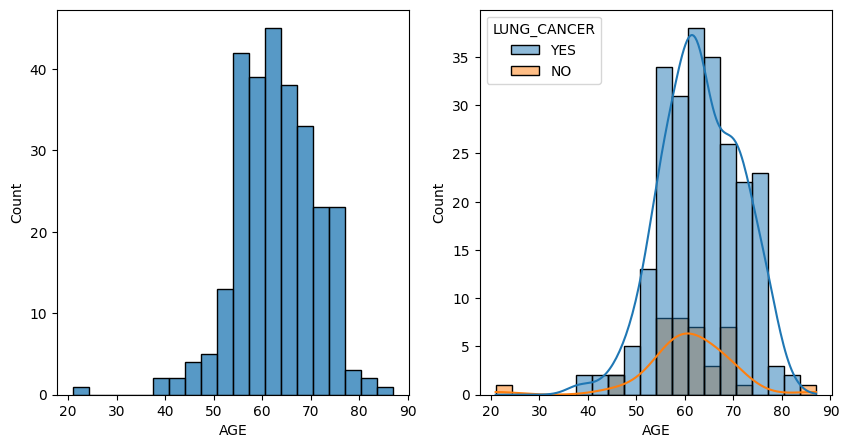

In [7]:
fix,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['AGE'],ax=ax[0])
sns.histplot(data=df,x='AGE',hue='LUNG_CANCER',ax=ax[1],kde=True)


<Axes: xlabel='LUNG_CANCER', ylabel='AGE'>

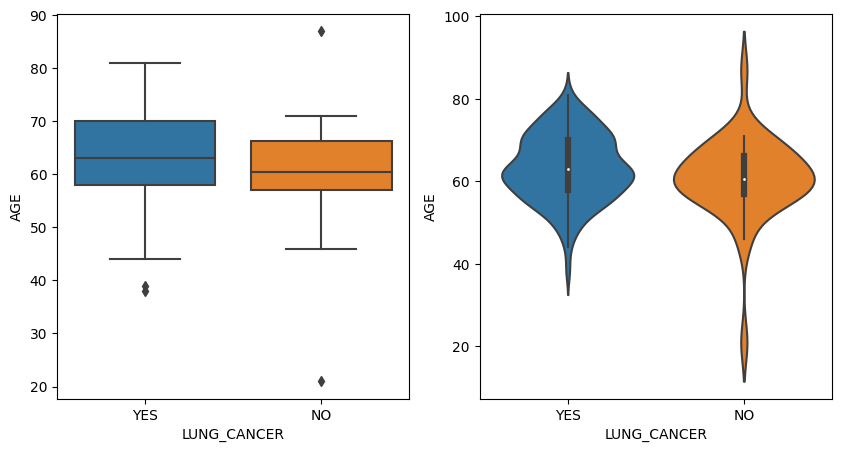

In [8]:
fix,ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=df,x='LUNG_CANCER',y='AGE',ax=ax[0])
sns.violinplot(data=df,x='LUNG_CANCER',y='AGE',ax=ax[1])


**The range of Age is around 50-70 and we can see that candidates around the youth i.e 20-40 arent affected by Lung Cancer. There are outliers as shown in the boxplot**

In [9]:
cat_data=df.drop('AGE',axis=1)
cat_data.columns

Index(['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

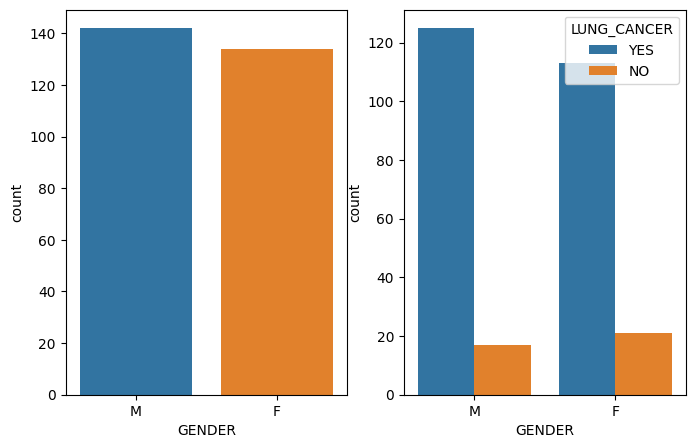

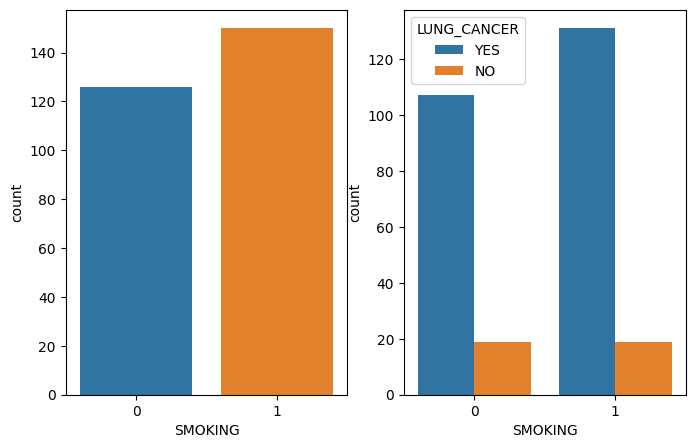

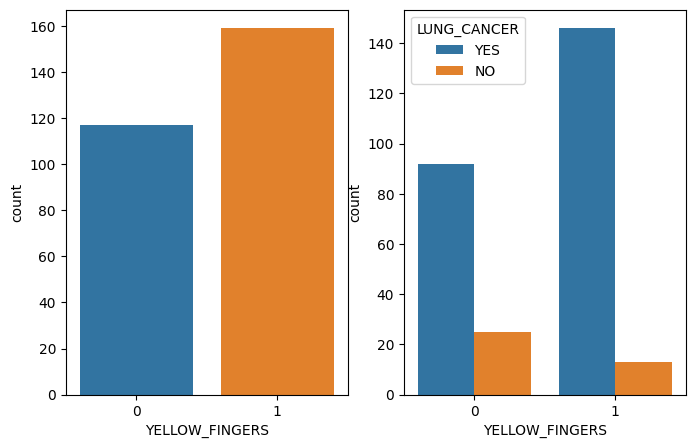

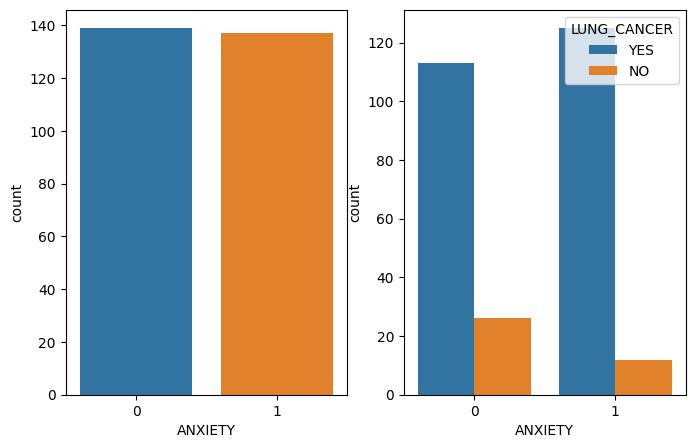

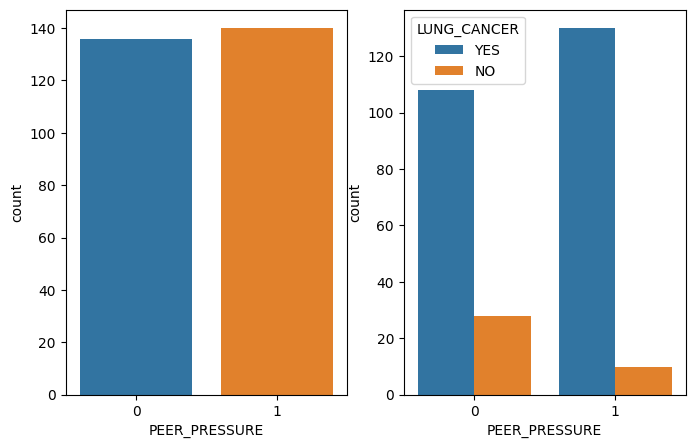

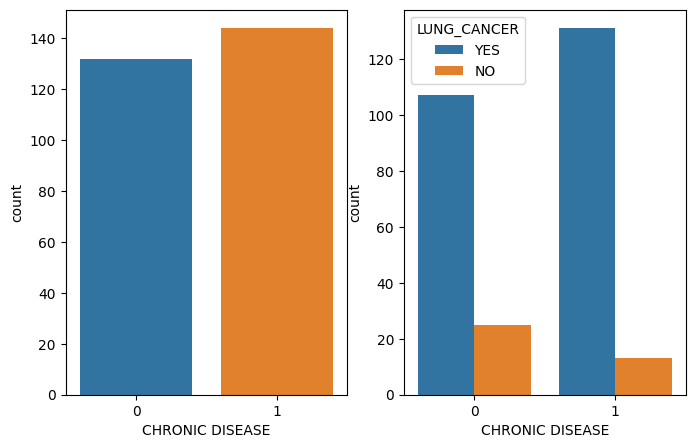

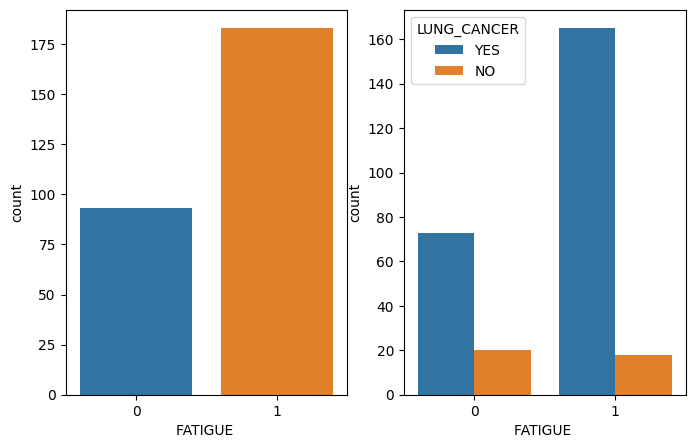

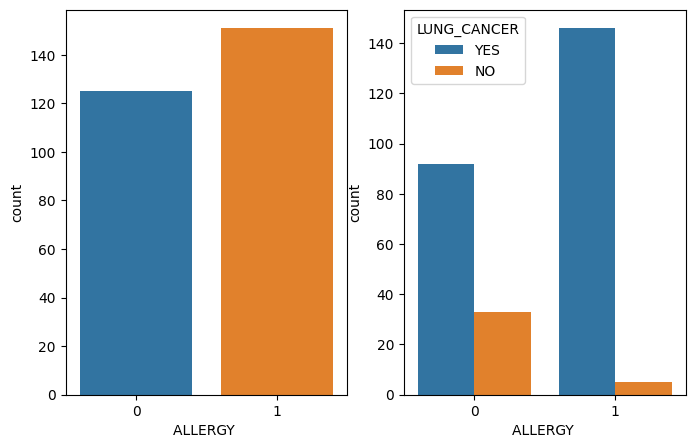

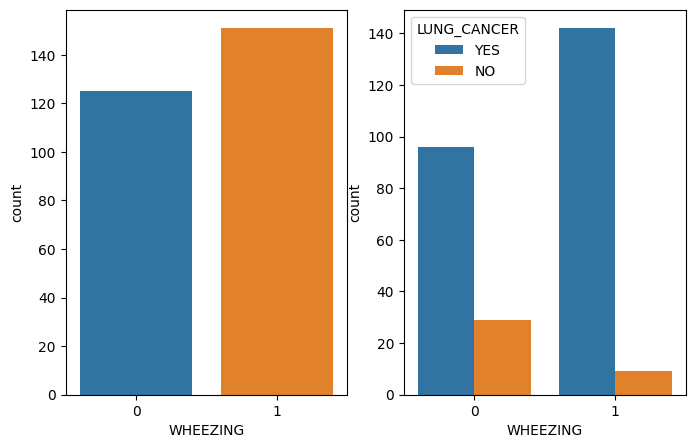

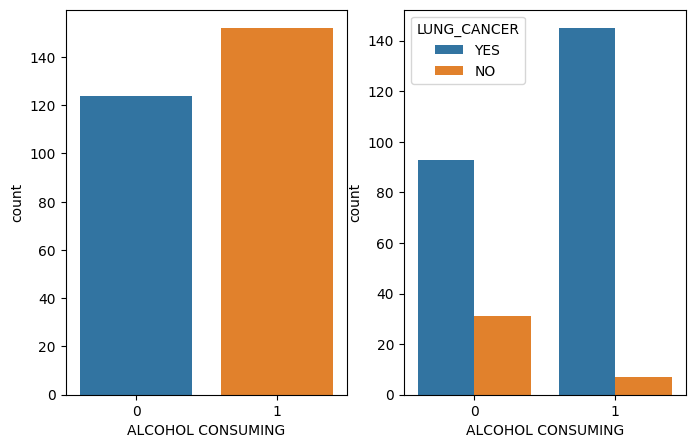

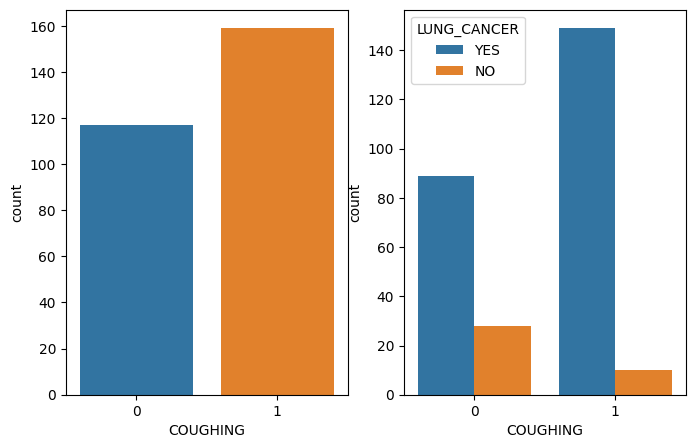

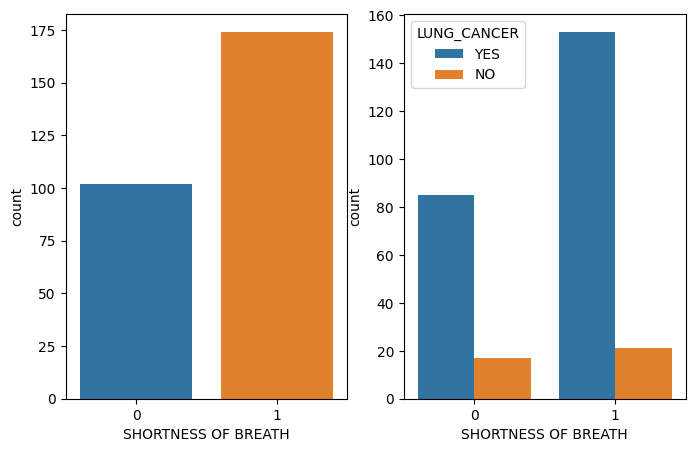

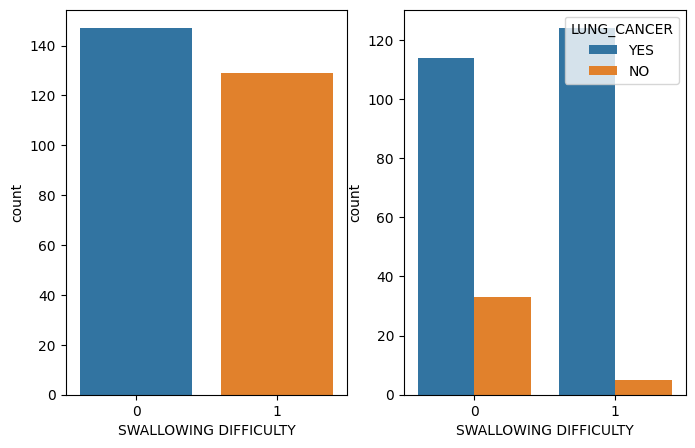

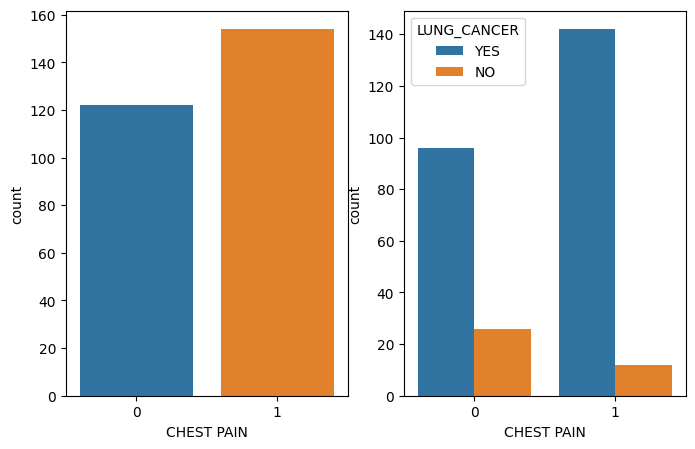

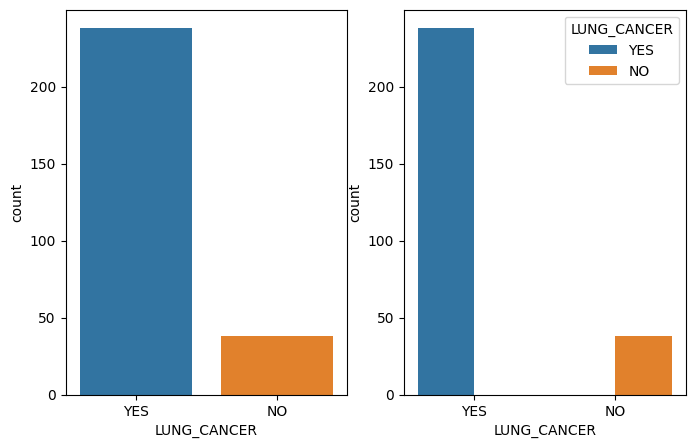

In [10]:
for i in cat_data.columns:
  plt.figure(figsize=(8,5))
  plt.subplot(1,2,1)
  sns.countplot(data=cat_data,x=i)

  plt.subplot(1,2,2)
  sns.countplot(data=cat_data,x=i,hue='LUNG_CANCER')

###**Quick observations**

1) The dataset is **imbalanced** as seen the countplots

2) **SMOKING** - The data is mostly composed of people who smoke.

3)**YELLOW_FINGERS** - Candidates with yellow fingers are more in the data.

4)**ANXIETY** - The dataset is balanced

5)**PEER_PRESSURE** - The dataset is balanced.

6)**CHRONIC_DISEASE** - The dataset is balanced.

7)**FATIGUE** - The dataset consists more of candidates feeling fatigueness

8)**ALLERGY** - The dataset consists fairly more with the candidates with
allergy

9)**WHEEZING** - The dataset consists of candidates with more wheezing symptoms.

10)**ALCOHOL CONSUMING** - The dataset consists of candidates who consume alcohol

11)**COUGHING** - The dataset consists of candidates with coughing symptomm.

12)**SHORTNESS OF BREATH** - The dataset consists of candidates with shortness
of breath symptoms

13)**SWALLOWING DIFFICULTY** - The dataset consists of candidates with no swallowing difficulty but fairly balanced.

14)**CHEST PAIN** - The dataset mostly composes of people with chest pain.


###**lets observe the relationship of categorical variables with Age**

AGE vs Categorical variables is plotted to see if there are any insights

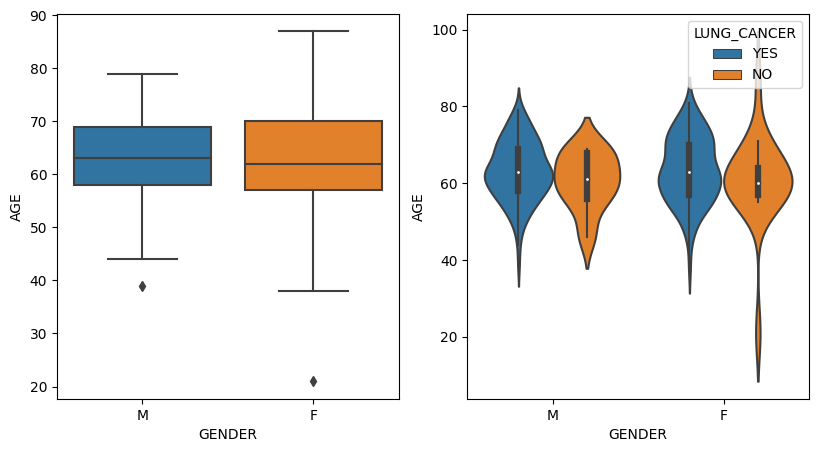

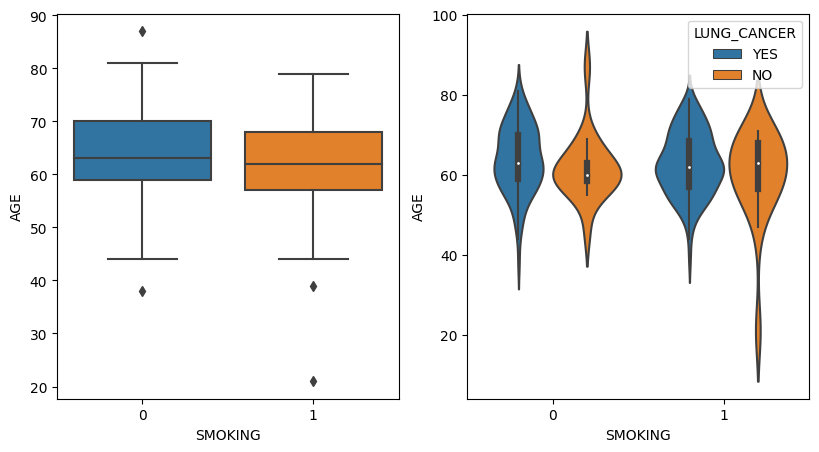

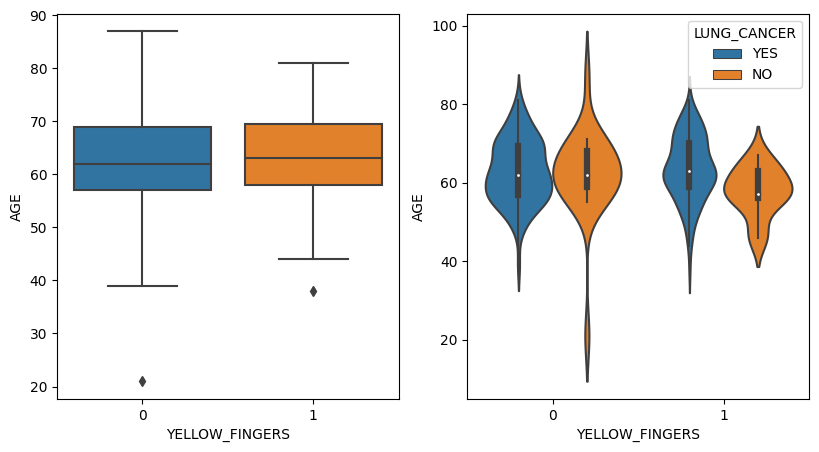

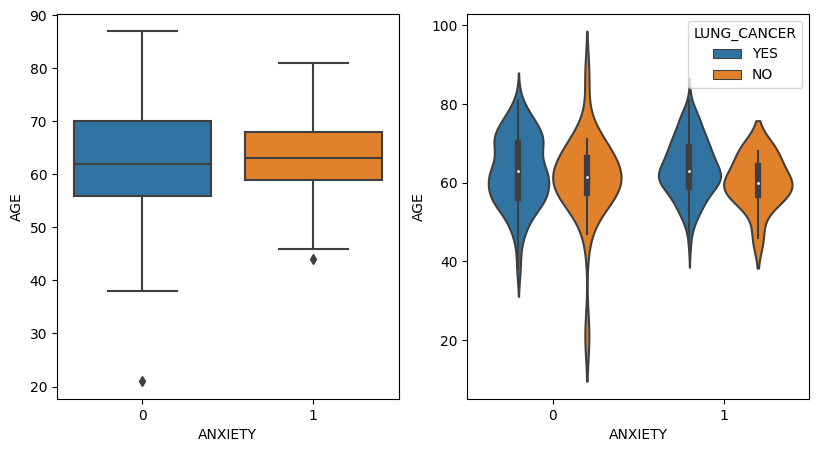

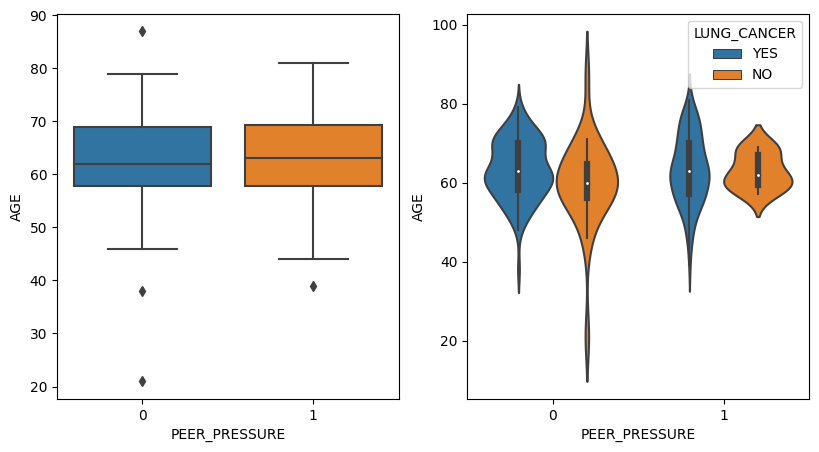

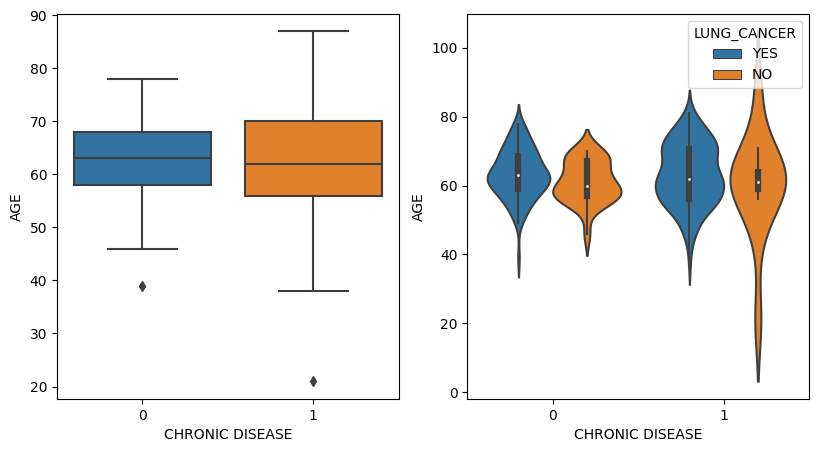

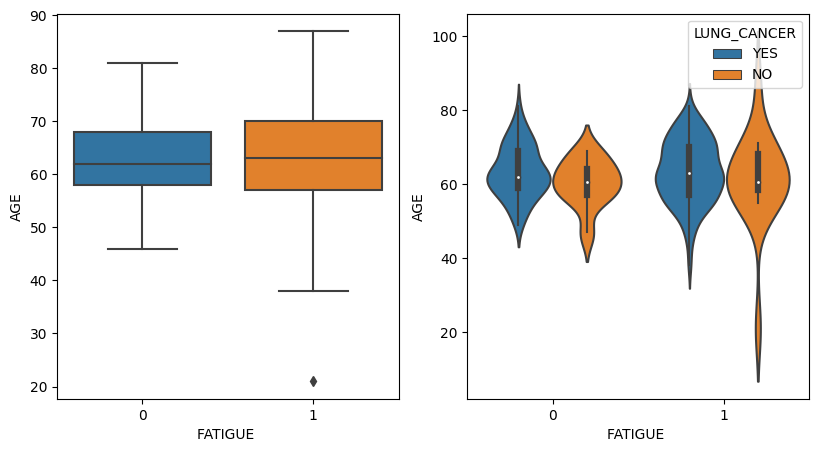

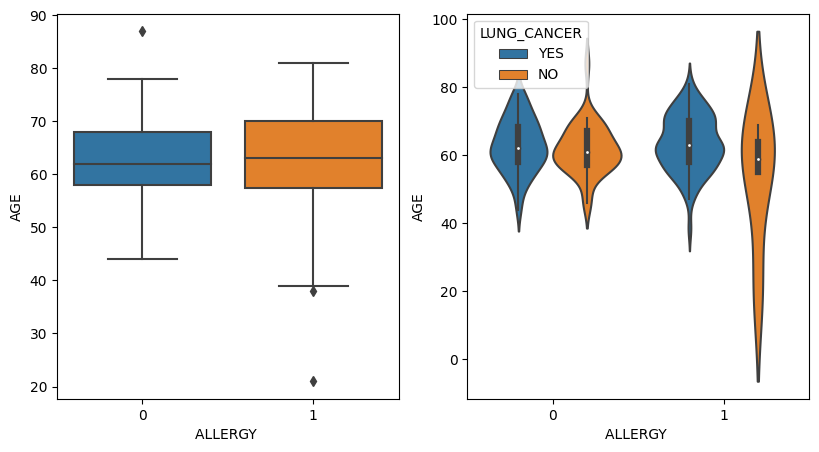

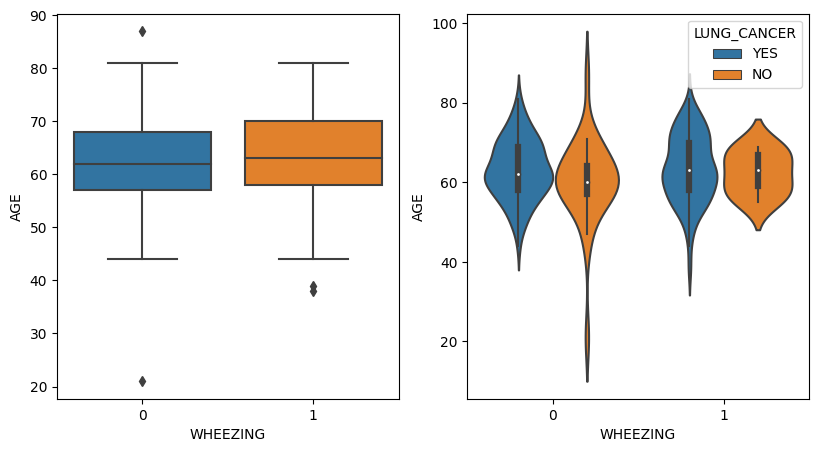

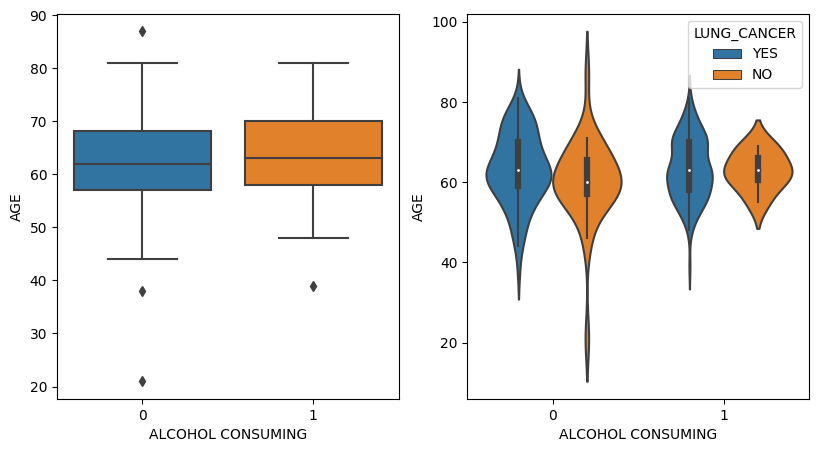

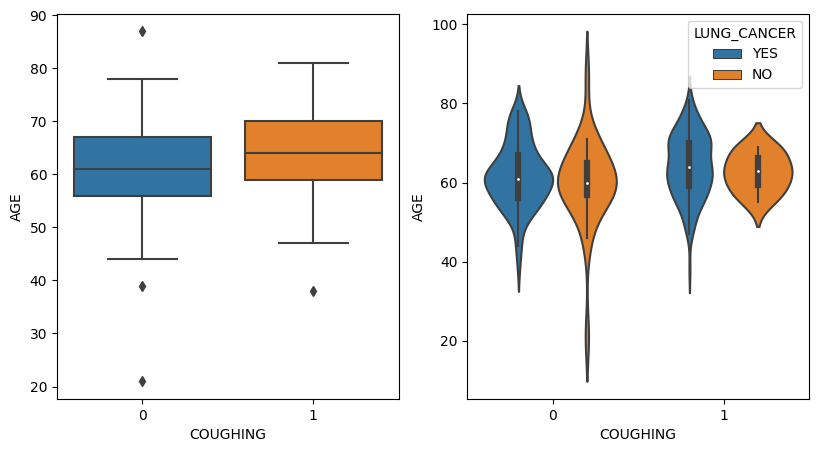

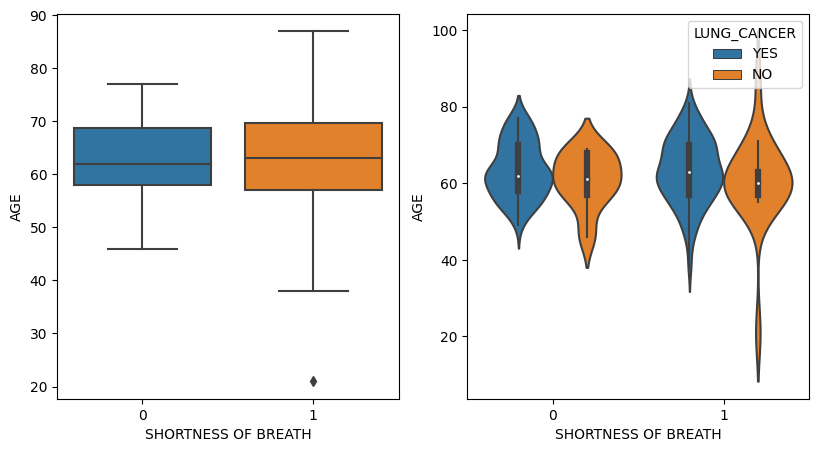

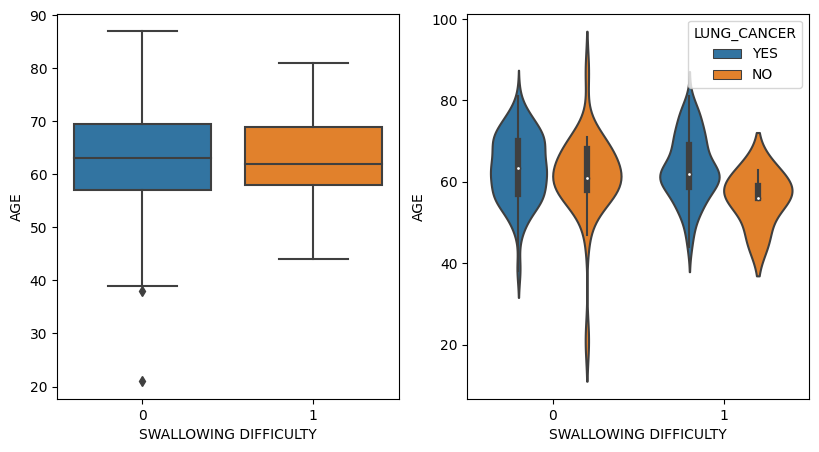

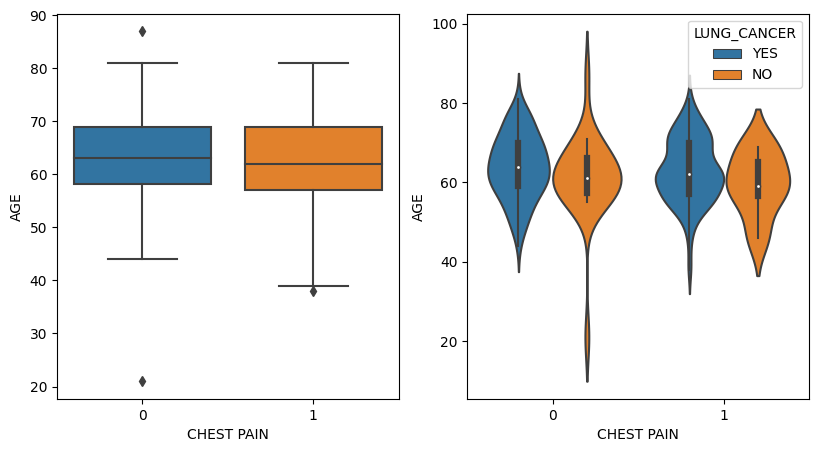

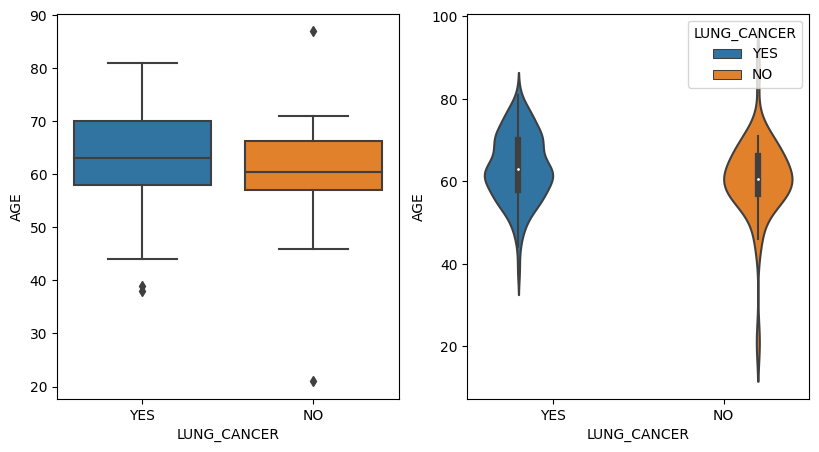

In [11]:
for i in cat_data.columns:
  plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  sns.boxplot(data=cat_data,x=i,y=df['AGE'])

  plt.subplot(1,3,2)
  sns.violinplot(data=cat_data,x=i,y=df['AGE'],hue='LUNG_CANCER')




#**DATA PREPROCESSING**

###**Label Encoder**

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


###**Defining the X and Y variables**

In [13]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

###**Over-Sampling the dataset as its imbalanced**

In [14]:
from imblearn.over_sampling import RandomOverSampler
X_oversamp,y_oversamp=RandomOverSampler().fit_resample(X,y)

###**Preparing the dataset with train test split**

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_oversamp,y_oversamp,random_state=10)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


###**Scaling the Age feature**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
238,0,0.215852,1,1,1,0,0,1,1,0,0,0,1,0,1
172,0,-0.298561,1,1,1,1,1,1,0,1,0,1,0,1,1
81,0,-0.812974,1,1,1,1,1,1,0,0,0,0,1,1,0
56,0,0.112969,0,1,0,1,0,1,0,0,0,1,1,0,1
314,1,0.730264,1,0,0,0,0,0,1,1,1,1,0,0,1


#**MODEL BUILDING**

In [17]:
from sklearn.svm import SVC
svc=SVC(probability=True)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [18]:
svc_model=svc.fit(X_train,y_train)

In [19]:
y_pred=svc.predict(X_test)

0.907563025210084
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        58
           1       0.90      0.92      0.91        61

    accuracy                           0.91       119
   macro avg       0.91      0.91      0.91       119
weighted avg       0.91      0.91      0.91       119



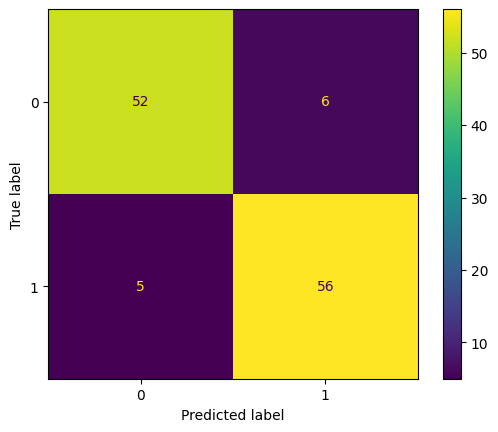

In [20]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(svc_model,X_test,y_test)

##**Support Vector Classifier was used in our model and we have achieved 94% Accuracy**

#**MODEL REUSE BY PICKLING**

In [21]:
import pickle

In [22]:
pickle.dump(scaler,open("age_scaling.pkl","wb"))
pickle.dump(svc,open("ML_model.pkl","wb"))

###**Testing our pickle files with our own inputs**

In [23]:
scalar=pickle.load(open("age_scaling.pkl","rb"))
svc=pickle.load(open("ML_model.pkl","rb"))

In [24]:
test_data=[0,59,0,0,0,1,0,1,0,1,0,1,1,0,1]

In [25]:
test_data[1]=scalar.transform(np.array(test_data[1]).reshape(-1,1))

In [26]:
age_scaled=test_data[1][0][0]

In [27]:
test_data[1]=age_scaled

In [28]:
test_data

[0, -0.2985610366666336, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]

In [29]:
test_data=np.array(test_data).reshape(1,-1)

In [30]:
y=svc.predict(test_data)

In [31]:
y

array([0])

In [32]:
svc.predict_proba(test_data)

array([[0.93091656, 0.06908344]])